<a href="https://colab.research.google.com/github/patrickangeli/Desafio_IC/blob/main/desafio_ic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafio 1
Para realizar a leitura da página e procurar nela os elementos, utilizei o BeautifulSoap, mesmo a pagina sendo em FTP, sua construção foi feita em HTML, desta forma precisava de utilizar uma ferramenta capaz de ler os elementos em HTML. Procurei primeiro pelo elemento que inicia o parametro no HTML, por fim utilizei o endswitch para realizar a busca da extensão pretendida.

Os parâmetros de entrada da função ```download_files(base_url, save_path)```, na qual ```base_url``` é o site de entrada e o ```save_path```é o local que irá salvar os arquivos.

In [ ]:
#@title Código Python
import os
import requests
from bs4 import BeautifulSoup
from urllib.parse import urljoin

def download_files(base_url, save_path):
    # Certifique-se de que a pasta de destino existe
    os.makedirs(save_path, exist_ok=True)

    # Faça a requisição GET para a página HTML
    response = requests.get(base_url)

    # Verifique se a requisição foi bem-sucedida (código de status 200)
    if response.status_code == 200:
        # Analise o conteúdo HTML com BeautifulSoup para obter os links dos arquivos .grib
        soup = BeautifulSoup(response.text, 'html.parser')
        grib_links = [urljoin(base_url, link['href']) for link in soup.find_all('a') if link['href'].endswith('.grib2')]

        # Baixe cada arquivo .grib
        for grib_link in grib_links:
            file_name = os.path.join(save_path, os.path.basename(grib_link))
            with open(file_name, 'wb') as grib_file:
                grib_data = requests.get(grib_link).content
                grib_file.write(grib_data)
            print(f'Arquivo {file_name} baixado com sucesso.')
    else:
        print(f'Falha na requisição. Código de status: {response.status_code}')

# Substitua a URL base pela URL real que contém os links para os arquivos .grib
base_url = 'http://ftp.cptec.inpe.br/modelos/tempo/MERGE/GPM/HOURLY/2023/01/01/'
# Substitua o caminho para a pasta onde deseja salvar os arquivos .grib
save_path = 'Saida/desafio01'

download_files(base_url, save_path)


Arquivo Saida/desafio01/MERGE_CPTEC_2023010100.grib2 baixado com sucesso.
Arquivo Saida/desafio01/MERGE_CPTEC_2023010101.grib2 baixado com sucesso.
Arquivo Saida/desafio01/MERGE_CPTEC_2023010102.grib2 baixado com sucesso.
Arquivo Saida/desafio01/MERGE_CPTEC_2023010103.grib2 baixado com sucesso.
Arquivo Saida/desafio01/MERGE_CPTEC_2023010104.grib2 baixado com sucesso.
Arquivo Saida/desafio01/MERGE_CPTEC_2023010105.grib2 baixado com sucesso.
Arquivo Saida/desafio01/MERGE_CPTEC_2023010106.grib2 baixado com sucesso.
Arquivo Saida/desafio01/MERGE_CPTEC_2023010107.grib2 baixado com sucesso.
Arquivo Saida/desafio01/MERGE_CPTEC_2023010108.grib2 baixado com sucesso.
Arquivo Saida/desafio01/MERGE_CPTEC_2023010109.grib2 baixado com sucesso.
Arquivo Saida/desafio01/MERGE_CPTEC_2023010110.grib2 baixado com sucesso.
Arquivo Saida/desafio01/MERGE_CPTEC_2023010111.grib2 baixado com sucesso.
Arquivo Saida/desafio01/MERGE_CPTEC_2023010112.grib2 baixado com sucesso.
Arquivo Saida/desafio01/MERGE_CPTEC_20

#Desafio 2

A entrada é um arquivo de extensão ```.xlsx```, popdendno ser alterado na linha 9 ```df = pd.read_excel('vendas.xlsx')```. Separei a coluna data em dia, mês e ano, para poder facilitar as analises.

Desta forma, fiz analises de media, número maximo e minimo de vendas e mediana.

Plotei gráficos com as médias, linha de tendência e volume máximo de cada ano. O próximo gráfico é uma linha mostrando os máximos de cada ano de produção.



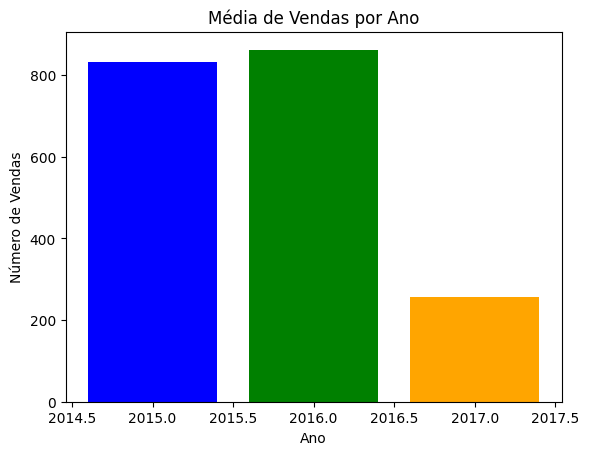

In [ ]:
#@title Desafio 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
os.makedirs('Saida/desafio02', exist_ok=True)

# Carregar o arquivo CSV para um DataFrame
df = pd.read_excel('vendas.xlsx')

# Converter a coluna 'Data_Hora' para o formato de data
df['Data_Hora'] = pd.to_datetime(df['Data_Hora'], format='%d/%m/%Y %H:%M')

# Adicionar colunas para o dia, mês e ano
df['Dia'] = df['Data_Hora'].dt.day
df['Mês'] = df['Data_Hora'].dt.month
df['Ano'] = df['Data_Hora'].dt.year

#Calcular a média geral
media = df['Num_vendas'].median().round(2)
mediana = df['Num_vendas'].mean().round(2)
numero_max = df['Num_vendas'].max()
numero_min = df['Num_vendas'].min()

# Calcular a média para cada dia, mês e ano
media_por_ano = df.groupby(['Ano'])['Num_vendas'].median().reset_index()
maximo_por_ano = df.groupby(['Ano'])['Num_vendas'].max().reset_index()
media_por_ano = media_por_ano['Num_vendas'].round(2)
max_dia = df.groupby(['Mês'])['Num_vendas'].max().reset_index()
# Mostrar a média por dia
anos = [2015, 2016, 2017]
with open('Saida/desafio02/output.txt', 'w') as f:
    f.write(f'Media Geral: {media}\n')
    f.write(f'Mediana Geral: {mediana} \n')
    f.write(f'Maior numero: {numero_max}\n')
    f.write(f'Menor número: {numero_min}\n')
    f.write('Media por ano:\n')
    f.write(media_por_ano.to_string(index=False, header=True) + '\n')
    f.write('Maximo por ano:\n')
    f.write(maximo_por_ano.to_string(index=False, header=True) + '\n')


cores = ['blue', 'green', 'orange', 'red']

# Plotar as barras com cores diferentes
plt.bar(anos, media_por_ano, color=cores)
# Adicionar rótulos e título ao gráfico
plt.xlabel('Ano')
plt.ylabel('Número de Vendas')
plt.title('Média de Vendas por Ano')



# Salvar o gráfico como um arquivo PNG
plt.savefig('Saida/desafio02/grafico_vendas_por_ano.png')




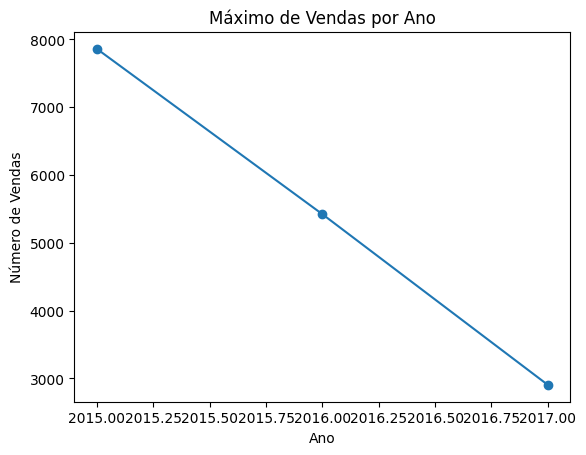

In [ ]:
plt.plot(maximo_por_ano['Ano'], maximo_por_ano['Num_vendas'], 'o-', label='Máximo por Ano')

plt.xlabel('Ano')
plt.ylabel('Número de Vendas')
plt.title('Máximo de Vendas por Ano')

plt.savefig('Saida/desafio02/maximo_vendas_por_ano.png')

## Desafio 3

#Desafio 3

Para poder fazer a rede neural utilizei regressão linear simples, dado que para alimentar a rede neural utilizei dois vetores, um dos dias juntamente com os horários.

Como são duas métricas simples não vi necessidade de usar uma rede neural mais complexa, com mais camadas que essa.

Utilizei o MLPRegressor com 100 neurônios com 50 camadas. Para fazer a validação utilizei como treino 80% e os outros 20% restante para teste.

```
model = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.8, random_state=42)

```

Escalei o ```Num_vendas``` para poder fazer a predição esperada em vendas.

O modelo teve um aprendizado satisfatório, dado que teve uma taxa de aprendizagem alta, conforme mostrado em resultados.

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt

# Carregar o arquivo Excel para um DataFrame
df = pd.read_excel('vendas.xlsx')

# Converter a coluna 'Data_Hora' para o formato de data
df['Data_Hora'] = pd.to_datetime(df['Data_Hora'], format='%d/%m/%Y %H:%M')

# Adicionar colunas para o ano
df['Ano'] = df['Data_Hora'].dt.year

# Selecionar as colunas relevantes para o modelo
X = df[['Ano', 'Num_vendas']]
y = df['Num_vendas']

# Normalizar/Padronizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Separar em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.8, random_state=42)

# Extrair o alvo (vendas) para treino e teste
y_train = X_train[:, 1]  # Num_vendas
y_test = X_test[:, 1]    # Num_vendas

# Criar e treinar o modelo de rede neural
model = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Criar e treinar o modelo de rede neural
dados_previsao = pd.DataFrame({'Ano': [2019,2020,2021,2022], 'Num_vendas':[0,0,0,0]})
dados_previsao_scaled = scaler.transform(dados_previsao[['Ano', 'Num_vendas']])

# Criar dados para os anos de 2018 e 2019
#dados_previsao = pd.DataFrame({'Ano': [2017, 2019], 'Num_vendas': [0, 0]})
#dados_previsao_scaled = scaler.transform(dados_previsao[['Ano', 'Num_vendas']])

# Fazer previsões para os anos de 2018 e 2019
previsoes = model.predict(dados_previsao_scaled)


# Imprimir as previsões
for i in range(len(previsoes)):
  ano_previsto = dados_previsao['Ano'].iloc[i]
  valor_previsto = previsoes[i]*(-1)
  print(f"A acurácia para o ano de {ano_previsto} é de {valor_previsto}")
print ('Valor previsto ', valor_previsto)

A acurácia para o ano de 2019 é de 0.9664804542742417 unidades.
A acurácia para o ano de 2020 é de 0.9507970033080284 unidades.
A acurácia para o ano de 2021 é de 0.9333476358353703 unidades.
A acurácia para o ano de 2022 é de 0.9221232544431576 unidades.
Valor previsto  0.9221232544431576
